In [4]:

import networkx as nx
G = nx.Graph()

In [5]:
G.add_node(1)

In [6]:
G.add_nodes_from([2, 3])

In [7]:
G.add_nodes_from([
    (4, {"color": "red"}),
    (5, {"color": "green"}),
])

In [8]:
H = nx.path_graph(10)
G.add_nodes_from(H)

In [9]:
G.add_node(H)

In [10]:
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)  # unpack edge tuple*

In [11]:
G.add_edges_from([(1, 2), (1, 3)])

In [12]:
G.add_edges_from(H.edges)

In [13]:
G.clear()

In [14]:
G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)
G.add_edge(1, 2)
G.add_node("spam")        # adds node "spam"
G.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_edge(3, 'm')

In [15]:
G.number_of_nodes()
8
G.number_of_edges()
3

3

In [16]:
DG = nx.DiGraph()
DG.add_edge(2, 1)   # adds the nodes in order 2, 1
DG.add_edge(1, 3)
DG.add_edge(2, 4)
DG.add_edge(1, 2)
assert list(DG.successors(2)) == [1, 4]
assert list(DG.edges) == [(2, 1), (2, 4), (1, 3), (1, 2)]

In [17]:
list(G.nodes)
[1, 2, 3, 'spam', 's', 'p', 'a', 'm']
list(G.edges)
[(1, 2), (1, 3), (3, 'm')]
list(G.adj[1])  # or list(G.neighbors(1))
[2, 3]
G.degree[1]  # the number of edges incident to 1
2

2

In [18]:
G.add_edge(1, 2)
H = nx.DiGraph(G)  # create a DiGraph using the connections from G
list(H.edges())
[(1, 2), (2, 1)]
edgelist = [(0, 1), (1, 2), (2, 3)]
H = nx.Graph(edgelist)  # create a graph from an edge list
list(H.edges())
[(0, 1), (1, 2), (2, 3)]
adjacency_dict = {0: (1, 2), 1: (0, 2), 2: (0, 1)}
H = nx.Graph(adjacency_dict)  # create a Graph dict mapping nodes to nbrs
list(H.edges())
[(0, 1), (0, 2), (1, 2)]

[(0, 1), (0, 2), (1, 2)]

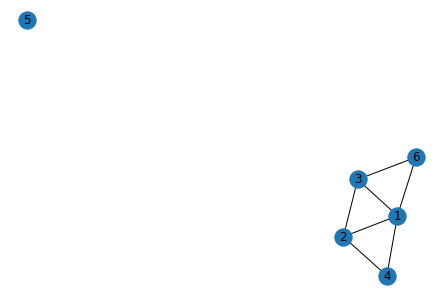

In [19]:
# Create undirected graph of 6 nodes and 7 links
G = nx.Graph([(1, 2), (1, 3), (1, 4), (1, 6), (2, 3), (2, 4),(3, 6)])
G.add_node(5)
nx.draw(G, with_labels=True)



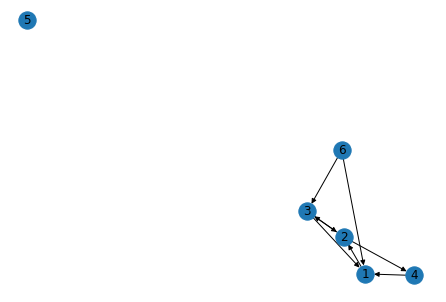

In [20]:
# create Directed graph of 6 nodes and 8 directed links

DG = nx.DiGraph([(1, 2), (6,1), (4,1), (3,1), (6, 3), (2, 4),(2, 3), (3, 2)])
DG.add_node(5)
nx.draw(DG, with_labels=True)


In [21]:

print(nx.average_clustering(G))

for path in nx.all_simple_paths(DG, source=1, target=3):
    print(path)


0.6388888888888888
[1, 2, 3]


In [22]:
from networkx.algorithms import bipartite

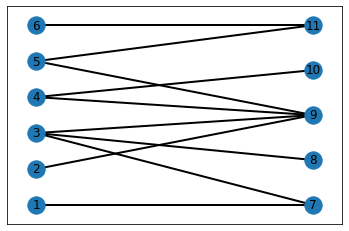

In [23]:
B = nx.Graph()
# Add nodes with the node attribute "bipartite"
B.add_nodes_from([1, 2, 3, 4, 5, 6], bipartite=0)
B.add_nodes_from([7, 8, 9, 10, 11], bipartite=1)
# Add edges only between nodes of opposite node sets
B.add_edges_from([(1, 7), (7, 3), (2, 9), (8, 3), (3, 9), (9, 4), (4,10),(5,9),(5,11),(6,11)])


bipartite.is_bipartite(B)

nx.draw_networkx(B, pos=nx.drawing.layout.bipartite_layout(B, [1, 2, 3, 4, 5, 6]), width = 2, with_labels=True)

In [24]:
from networkx.algorithms.bipartite import biadjacency_matrix


AD = biadjacency_matrix(B, [1, 2, 3, 4, 5, 6], [7, 8, 9, 10, 11])

print(AD.todense())

[[1 0 0 0 0]
 [0 0 1 0 0]
 [1 1 1 0 0]
 [0 0 1 1 0]
 [0 0 1 0 1]
 [0 0 0 0 1]]


C:\Users\scitu\AppData\Local\Temp\ipykernel_10636\2649309932.py:4: FutureWarning: biadjacency_matrix will return a scipy.sparse array instead of a matrix in NetworkX 3.0
  AD = biadjacency_matrix(B, [1, 2, 3, 4, 5, 6], [7, 8, 9, 10, 11])


In [49]:
G = bipartite.projected_graph(B, [1, 2, 3, 4, 5, 6], multigraph=True)
G = ([sorted((u, v)) for u, v in G.edges()]) 
G1 = nx.Graph(G)

A = nx.adjacency_matrix(G1)
print(A.todense())

[[0 1 0 0 0 0]
 [1 0 1 1 1 0]
 [0 1 0 1 1 0]
 [0 1 1 0 1 0]
 [0 1 1 1 0 1]
 [0 0 0 0 1 0]]


C:\Users\scitu\AppData\Local\Temp\ipykernel_10636\1757877847.py:5: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G1)


In [26]:
G1 = bipartite.projected_graph(B, [7,8,9,10,11], multigraph=True)
G1 = ([sorted((u, v)) for u, v in G1.edges()]) 
print(G1)
G2 = nx.Graph(G1)
A2 = nx.adjacency_matrix(G2)
print(A2.todense())

[[7, 8], [7, 9], [8, 9], [9, 10], [9, 11]]
[[0 1 1 0 0]
 [1 0 1 0 0]
 [1 1 0 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]


C:\Users\scitu\AppData\Local\Temp\ipykernel_10636\1154220411.py:5: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A2 = nx.adjacency_matrix(G2)


In [46]:
#calculate average degree 

print(A.sum()/A.shape[0])
print(A2.sum()/A2.shape[0])





2.6666666666666665
2.0


In [60]:
deg = bipartite.degrees(G1, [1, 2, 3, 4, 5, 6])
print(deg)



deg2 = bipartite.degrees(G2, [7,8,9,10,11])
print(deg2)







(DegreeView({}), DegreeView({1: 1, 2: 3, 3: 4, 4: 3, 5: 4, 6: 1}))
(DegreeView({}), DegreeView({7: 2, 8: 2, 9: 4, 10: 1, 11: 1}))
4.666666666666666


In [61]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random as rd



(array([  24.,  137.,  546., 1133., 1487., 1084.,  465.,  100.,   20.,
           4.]),
 array([1.58018812, 1.67489691, 1.7696057 , 1.8643145 , 1.95902329,
        2.05373209, 2.14844088, 2.24314968, 2.33785847, 2.43256726,
        2.52727606]),
 <BarContainer object of 10 artists>)

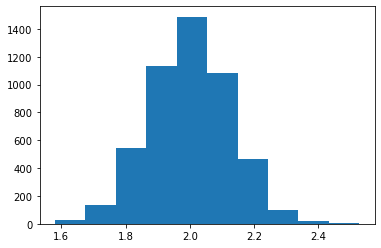

In [101]:
# generate 5000 data points from gaussian distribution with mean 2 and variance 0.125
x = np.random.normal(2, 0.125, 5000)

bins = np.histogram(x, bins=10)

plt.hist(x, bins=10)

In [102]:
x1 = np.random.poisson(lam=10, size=5000)

print(max(x1))
print(min(x1))

26
0


(array([  1.,   1.,  13.,  36.,  84., 175., 312., 418., 596., 641., 612.,
        581., 484., 366., 260., 170., 123.,  54.,  37.,  17.,   8.,   7.,
          3.,   0.,   0.,   1.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <BarContainer object of 26 artists>)

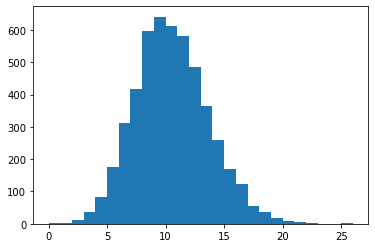

In [104]:
#Create a vector v that results in a binning that puts each integer value in its own bin and where the first bin contains the minimum number you found above, and the last bin contains the maximum number you found above.

v = np.arange(min(x1), max(x1)+1,1)

plt.hist(x1, bins=v)



0.002000400080016003


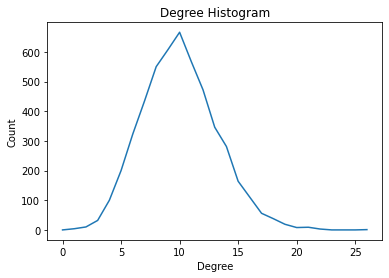

In [120]:
#generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above. which values the ER parameters (N and p) should assume. It's easy to see that N=5000, but how do you find p? Hint: The parameter λ in the Poisson distribution corresponds to the average degree, so you have to find a p that results in an average degree, k=10. And you know that ⟨k⟩=p(N−1), which will give you p.

p = 10/(5000-1)
print(p)

G = nx.erdos_renyi_graph(5000, p)

#create a bar chart with the degree distribution of the ER network


deg = nx.degree_histogram(G)
plt.plot(deg)
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()




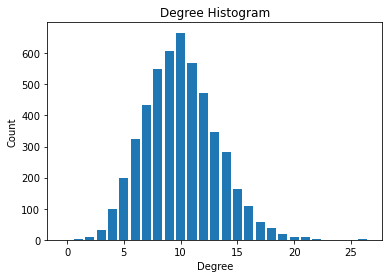

In [121]:
#create a bar plot 

plt.bar(range(len(deg)), deg, align='center')
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()





In [116]:
p = 10/(5000-1)

G = nx.erdos_renyi_graph(5000, p)
print(max(G))

4999


In [130]:
# generate the Erdös-Renyi (ER) network

N = 3000
p = 10**(-3)

# Average number of links

L = (p*N*(N-1))/2


# In which regime is the network?

if L < 1:
    print("Subcritical")
elif L == 1:
    print("Critical")
else:
    print("Supercritical")





Supercritical
